In [1]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the average square gradients for each variable
	sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate gradient
		gradient = derivative(solution[0], solution[1])
		# update the average of the squared partial derivatives
		for i in range(gradient.shape[0]):
			# calculate the squared gradient
			sg = gradient[i]**2.0
			# update the moving average of the squared gradient
			sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the step size for this variable
			alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
			# calculate the new position in this variable
			value = solution[i] - alpha * gradient[i]
			# store this variable
			new_solution.append(value)
		# evaluate candidate point
		solution = asarray(new_solution)
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return [solution, solution_eval]
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
best, score = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21

>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21

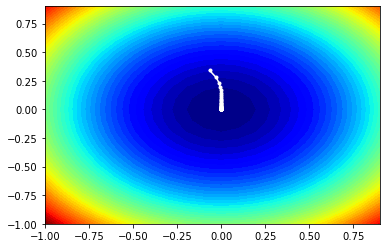

In [2]:
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the average square gradients for each variable
	sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate gradient
		gradient = derivative(solution[0], solution[1])
		# update the average of the squared partial derivatives
		for i in range(gradient.shape[0]):
			# calculate the squared gradient
			sg = gradient[i]**2.0
			# update the moving average of the squared gradient
			sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
		# build solution
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the learning rate for this variable
			alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
			# calculate the new position in this variable
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()